In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
tel1 = pd.read_csv('TelcomCustomer-Churn_1.csv') 

In [3]:
tel1.head(5) # top 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
# Read the dataset
tel2 = pd.read_csv('TelcomCustomer-Churn_2.csv') 

In [5]:
tel2.head(5) # top 5 rows

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
tel =pd.concat([tel1,tel2],axis=1,sort=False)

In [7]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
for feature in tel.columns: # Loop through all columns in the dataframe
    if tel[feature].dtype == 'object': # Only apply for columns with categorical strings
        tel[feature] = pd.Categorical(tel[feature])# Replace strings with an integer
tel.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [11]:
tel['customerID']=tel['customerID'].astype('object')
tel['TotalCharges']=tel['TotalCharges'].astype('object')
# tel['TotalCharges'] = pd.Object(tel['TotalCharges'])
s=tel['TotalCharges']
# Converting years in to integer format such that low year is taken as team launch year 
charge=s.copy()

for i in range(7043):
    charge[i]=""
    for c in s[i]:
        if (c.isdigit() or c=='.'):
            charge[i]=charge[i]+c
    if charge[i]=='':
        charge[i]=0
charge[i]=float(charge[i])
            
tel['TotalCharges']=charge.astype('float64')


Dealing with emplty vaalues by filling average

In [12]:
a=tel['TotalCharges'].mean()
s=tel['TotalCharges']
for i in range(7043):
    if s[i]==0:
        s[i]=a
        
        
tel['TotalCharges']=s


<ipython-input-12-5817b0fc6859>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[i]=a


In [13]:
tel['SeniorCitizen'] = pd.Categorical(tel['SeniorCitizen'])

In [14]:
tel.info()
tel.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
print(tel.gender.value_counts())
print(tel.SeniorCitizen.value_counts())
print(tel.Partner.value_counts())
print(tel.Dependents.value_counts())
print(tel.PhoneService.value_counts())
print(tel.MultipleLines.value_counts())
print(tel.InternetService.value_counts())
print(tel.OnlineSecurity.value_counts())
print(tel.OnlineBackup.value_counts())
print(tel.DeviceProtection.value_counts())
print(tel.TechSupport.value_counts())
print(tel.StreamingTV.value_counts())
print(tel.StreamingMovies.value_counts())
print(tel.Contract.value_counts())
print(tel.PaperlessBilling.value_counts())
print(tel.PaymentMethod.value_counts())
print(tel.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [16]:
print("Churn Yes Values    : {0} ({1:0.2f}%)".format(len(tel.loc[tel['Churn'] == 'Yes']), (len(tel.loc[tel['Churn'] == "Yes"])/len(tel.Churn)) * 100))
print("Churn No Values   : {0} ({1:0.2f}%)".format(len(tel.loc[tel['Churn'] == "No"]), (len(tel.loc[tel['Churn'] == "No"])/len(tel.Churn)) * 100))


Churn Yes Values    : 1869 (26.54%)
Churn No Values   : 5174 (73.46%)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

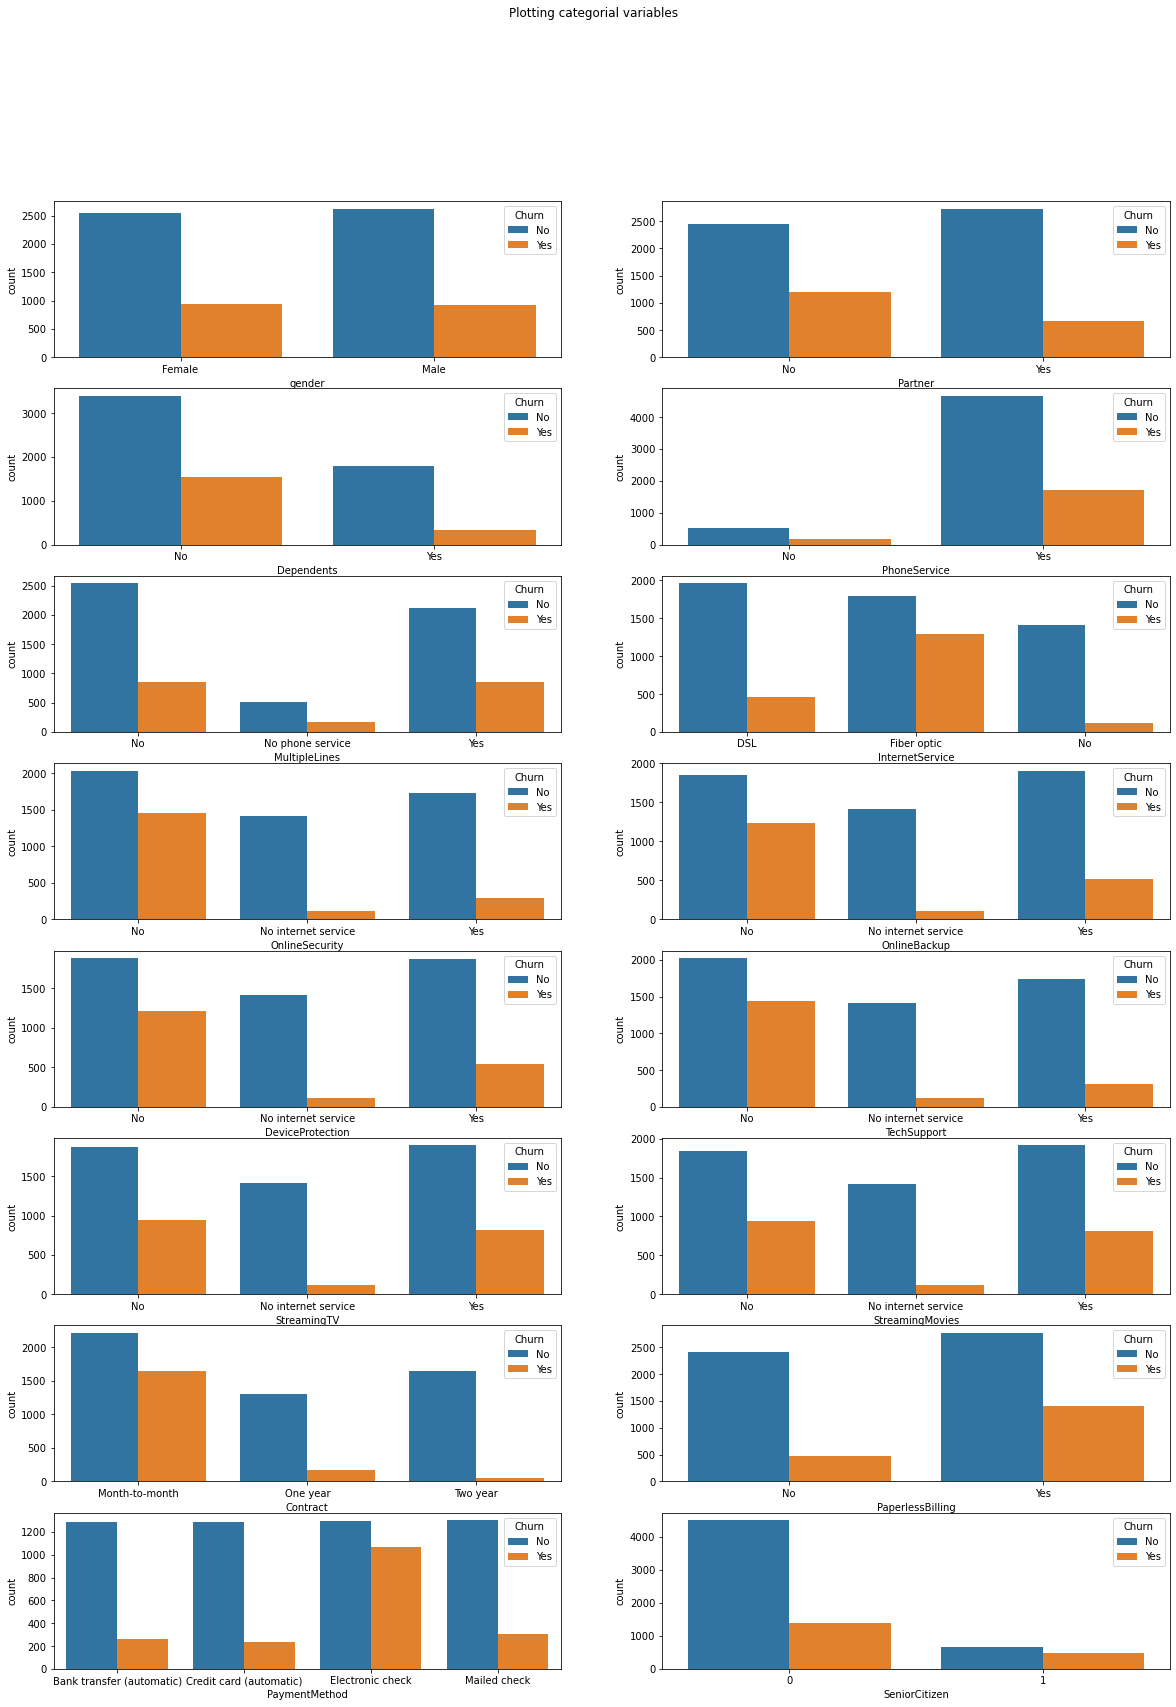

In [17]:
fig, axes = plt.subplots(8, 2, figsize=(20, 27))

fig.suptitle('Plotting categorial variables')

sns.countplot(ax=axes[0, 0], data=tel, x ='gender',hue = "Churn")
sns.countplot(ax=axes[0, 1], data=tel, x ='Partner',hue = "Churn")
sns.countplot(ax=axes[1, 0], data=tel, x ='Dependents',hue = "Churn")
sns.countplot(ax=axes[1, 1], data=tel, x ='PhoneService',hue = "Churn")
sns.countplot(ax=axes[2, 0], data=tel, x ='MultipleLines',hue = "Churn")
sns.countplot(ax=axes[2, 1], data=tel, x ='InternetService',hue = "Churn")
sns.countplot(ax=axes[3, 0], data=tel, x ='OnlineSecurity',hue = "Churn")
sns.countplot(ax=axes[3, 1], data=tel, x ='OnlineBackup',hue = "Churn")
sns.countplot(ax=axes[4, 0], data=tel, x ='DeviceProtection',hue = "Churn")
sns.countplot(ax=axes[4, 1], data=tel, x ='TechSupport',hue = "Churn")
sns.countplot(ax=axes[5, 0], data=tel, x ='StreamingTV',hue = "Churn")
sns.countplot(ax=axes[5, 1], data=tel, x ='StreamingMovies',hue = "Churn")
sns.countplot(ax=axes[6, 0], data=tel, x ='Contract',hue = "Churn")
sns.countplot(ax=axes[6, 1], data=tel, x ='PaperlessBilling',hue = "Churn")
sns.countplot(ax=axes[7, 0], data=tel, x ='PaymentMethod',hue = "Churn")
sns.countplot(ax=axes[7, 1], data=tel, x ='SeniorCitizen',hue = "Churn")




From plots it can be seen that users of fibre optic have high churn probability
Customers with No Internet Security, No Online Security, No Device protection, No Tech Support, No Streaming TV, No Streaming movies have high churn probablity
Senior citizen have high probabity of churn

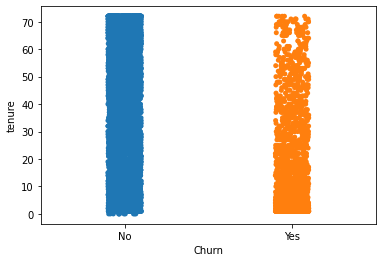

In [18]:
sns.stripplot(x=tel['Churn'],y=tel['tenure']);

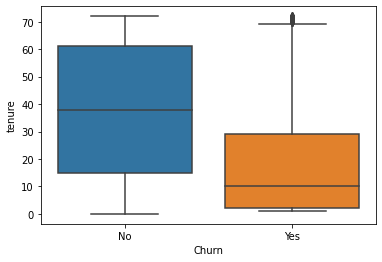

In [19]:
sns.boxplot(x=tel['Churn'],y=tel['tenure']);

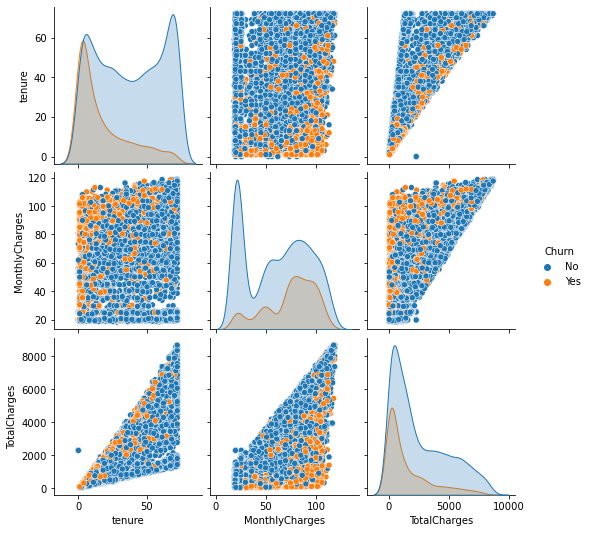

In [20]:
sns.pairplot(tel,hue='Churn');

In [21]:
creditData=tel.copy()

In [22]:
replaceStruct = {
                "gender":     {"Female": 0, "Male": 1},
                "MultipleLines": {"No": 0, "Yes":1 , "No phone service": 2},
                "Contract":     {"Month-to-month": 0, "One year": 1, "Two year": 2 },
                "DeviceProtection":     {"No": 0, "Yes": 1, "No internet service":2},
                "OnlineSecurity":     {"No": 0, "Yes": 1, "No internet service":2},
    "OnlineBackup":     {"No": 0, "Yes": 1, "No internet service":2},
    "TechSupport":     {"No": 0, "Yes": 1, "No internet service":2},
    "StreamingTV":     {"No": 0, "Yes": 1, "No internet service":2},
    "StreamingMovies":     {"No": 0, "Yes": 1, "No internet service":2},
    "Partner":    {"No": 0, "Yes": 1},
    "Dependents":    {"No": 0, "Yes": 1},
    "PhoneService":    {"No": 0, "Yes": 1},
    "PaperlessBilling":    {"No": 0, "Yes": 1},
    "Churn":    {"No": 0, "Yes": 1},
    
                    }
oneHotCols=["InternetService","PaymentMethod"]

In [23]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,2,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,0,...,42.30,1840.75,0,1,0,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,...,99.65,820.50,1,0,1,0,0,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,0,1,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,2,1,0,...,29.75,301.90,0,1,0,0,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,1,0,0,...,104.80,3046.05,1,0,1,0,0,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,56.15,3487.95,0,1,0,0,1,0,0,0


In [24]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   object  
 1   gender                                   7043 non-null   int64   
 2   SeniorCitizen                            7043 non-null   category
 3   Partner                                  7043 non-null   int64   
 4   Dependents                               7043 non-null   int64   
 5   tenure                                   7043 non-null   int64   
 6   PhoneService                             7043 non-null   int64   
 7   MultipleLines                            7043 non-null   int64   
 8   OnlineSecurity                           7043 non-null   int64   
 9   OnlineBackup                             7043 non-null   int64   
 10  DeviceProtection                    

In [25]:
creditData['SeniorCitizen']=creditData['SeniorCitizen'].astype('int')
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [26]:
X = creditData.drop("Churn", axis=1)
X = X.drop("customerID", axis=1)
y = creditData['Churn']

In [27]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5925,1,0,0,0,20,1,1,0,1,0,...,1,68.70,1416.2,1,0,0,0,0,1,0
4395,0,0,1,1,69,1,1,0,1,1,...,1,103.95,7446.9,0,1,0,0,0,1,0
1579,1,1,1,0,12,1,0,0,0,0,...,1,80.45,950.2,0,1,0,0,0,1,0
1040,1,1,0,0,14,1,0,0,0,0,...,0,90.45,1266.1,0,1,0,0,1,0,0
1074,1,0,0,0,1,1,0,2,2,2,...,0,21.10,21.1,0,0,1,0,0,0,1


In [28]:
y_train.head()

5925    0
4395    1
1579    1
1040    1
1074    0
Name: Churn, dtype: int64

In [29]:
print("Original Churn Yes Values    : {0} ({1:0.2f}%)".format(len(creditData.loc[creditData['Churn'] == 1]), (len(creditData.loc[creditData['Churn'] == 1])/len(creditData.Churn)) * 100))
print("Original Churn No Values   : {0} ({1:0.2f}%)".format(len(creditData.loc[creditData['Churn'] == 0]), (len(creditData.loc[creditData['Churn'] == 0])/len(creditData.Churn)) * 100))
print("")
print("Training Churn Yes Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Churn No Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Churn Yes Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Churn No Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Churn Yes Values    : 1869 (26.54%)
Original Churn No Values   : 5174 (73.46%)

Training Churn Yes Values    : 1341 (27.20%)
Training Churn No Values   : 3589 (72.80%)

Test Churn Yes Values        : 528 (24.99%)
Test Churn No Values       : 1585 (75.01%)



Train and Test data have similar proportion of Yes and No values of Churn as that in original data set

## Build Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [46]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9979716024340771
0.7378135352579271


## Reducing over fitting (Regularization)

In [34]:
from sklearn.tree import DecisionTreeClassifier

dTreeR = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTreeR.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [35]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.788235294117647
0.7979176526265973


In [49]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTreeR, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

## Visualizing the Decision Tree

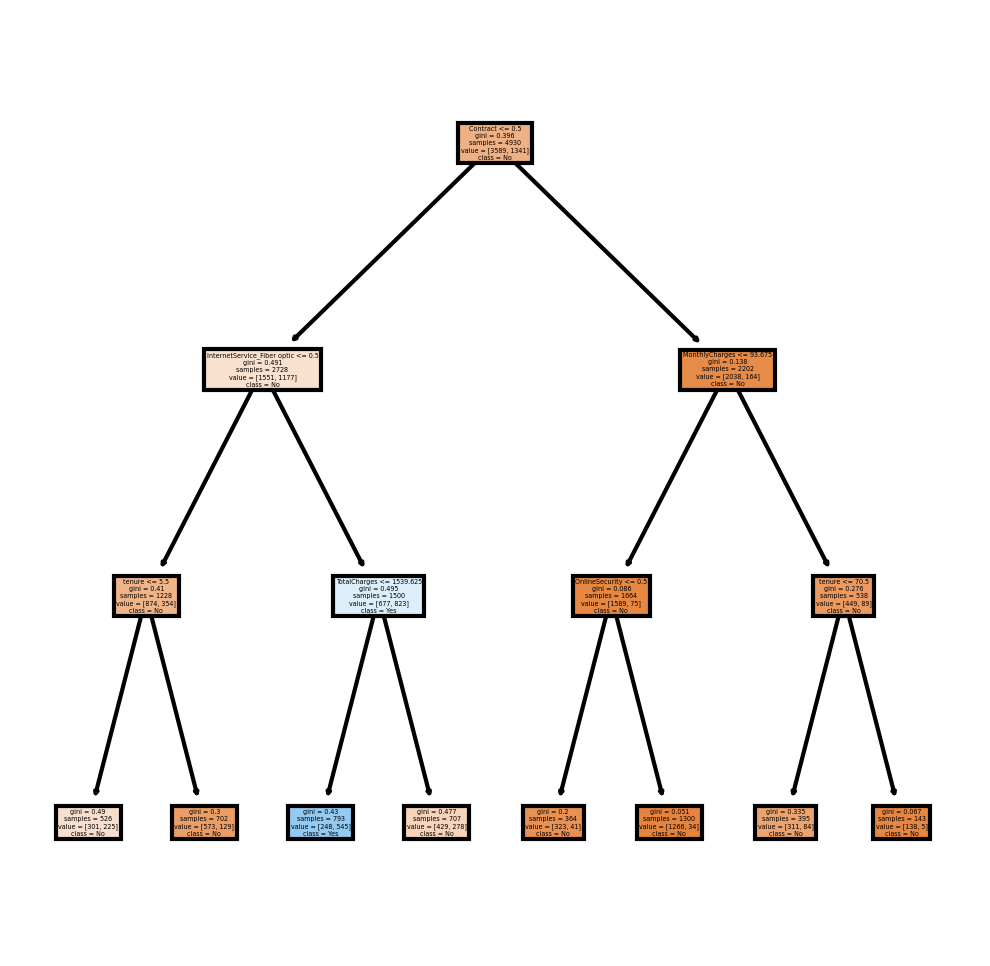

In [37]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [75]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                                              Imp
gender                                   0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.080793
PhoneService                             0.000000
MultipleLines                            0.000000
OnlineSecurity                           0.008099
OnlineBackup                             0.000000
DeviceProtection                         0.000000
TechSupport                              0.000000
StreamingTV                              0.000000
StreamingMovies                          0.000000
Contract                                 0.591270
PaperlessBilling                         0.000000
MonthlyCharges                           0.022426
TotalCharges                             0.123069
InternetService_DSL                      0.000000
InternetService_Fiber optic              0.174342


0.7979176526265973


<AxesSubplot:>

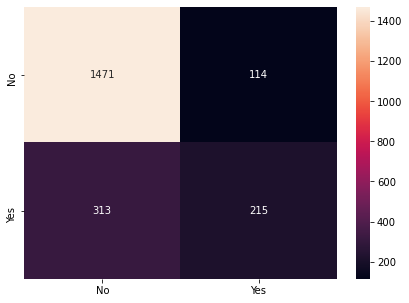

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#                             Ensemble Learning - Bagging

In [62]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.792238523426408


<AxesSubplot:>

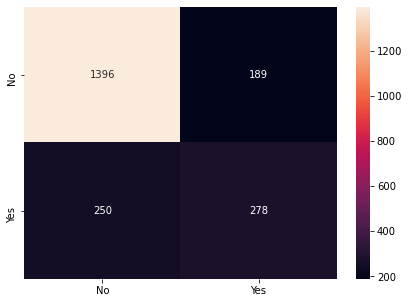

In [64]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [66]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.8002839564600095


<AxesSubplot:>

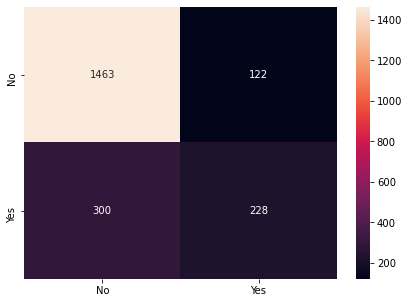

In [67]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Bagging classifier with regularization gives better results

# Ensemble Learning - AdaBoosting

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)

abcl = abcl.fit(x_train, y_train)

0.8111689540937056


<AxesSubplot:>

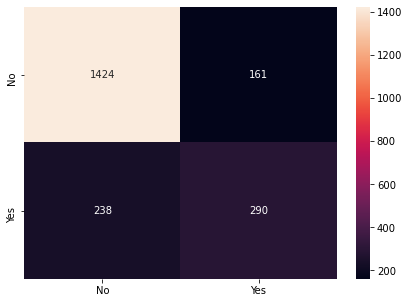

In [78]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#                     Ensemble Learning - GradientBoost

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.804070042593469


<AxesSubplot:>

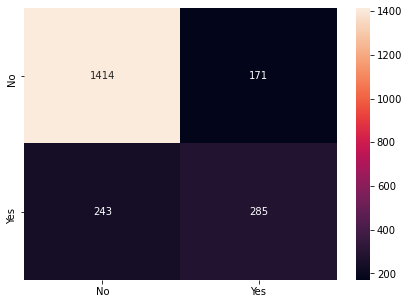

In [69]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.7969711310932324


<AxesSubplot:>

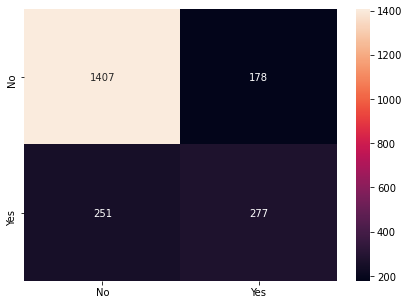

In [79]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')